<a href="https://colab.research.google.com/github/Javeria-Arif/CnnOnCifar10Dataset/blob/main/Image_Classification_Using_CNN_on_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading the dataset


There are 50000 training images and 10000 test images

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

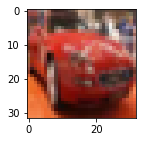

In [10]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[5])

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
y_test = y_test.reshape(-1,)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

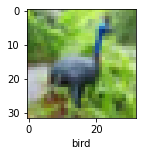

In [17]:
plot_sample(X_train, y_train, 6)

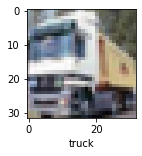

In [18]:
plot_sample(X_train, y_train, 1)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Simple ANN for classification.

In [21]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8098 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.6203 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5418 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4788 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4291 - accuracy: 0.4976


We got 49% accuracy using ANN(5 epochs), which is still not good.

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.45      0.53      1000
           1       0.51      0.74      0.60      1000
           2       0.46      0.22      0.30      1000
           3       0.39      0.22      0.28      1000
           4       0.45      0.42      0.44      1000
           5       0.33      0.47      0.39      1000
           6       0.47      0.61      0.53      1000
           7       0.53      0.59      0.56      1000
           8       0.57      0.69      0.62      1000
           9       0.58      0.48      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



Now, building CNN to train images.

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4816 - accuracy: 0.4650
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1299 - accuracy: 0.6032
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0014 - accuracy: 0.6518
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9209 - accuracy: 0.6806
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8490 - accuracy: 0.7054
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7945 - accuracy: 0.7239
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7481 - accuracy: 0.7383
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7046 - accuracy: 0.7578
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6660 - accuracy: 0.7682
Epoch 10/10
1563/1563 [==============================] - 61s 39m

We see how CNN improved the accuracy to 78%

In [27]:
cnn.evaluate(X_test,y_test)
y_pred = cnn.predict(X_test)
y_pred[:5]


313/313 [==============================] - 4s 12ms/step - loss: 0.9476 - accuracy: 0.6874


array([[1.21651996e-04, 5.60670451e-04, 1.32791721e-03, 8.44094515e-01,
        6.66720001e-03, 3.70099880e-02, 1.07964136e-01, 2.17627348e-05,
        5.90778945e-04, 1.64137431e-03],
       [6.90507377e-03, 7.42924539e-03, 5.25284486e-06, 3.42734165e-06,
        1.62166737e-06, 6.88488200e-08, 7.02110697e-07, 3.62173296e-07,
        9.82841015e-01, 2.81316205e-03],
       [1.20527402e-01, 7.71383643e-02, 1.31236613e-02, 7.54875317e-02,
        2.71694884e-02, 4.59579751e-03, 1.82065985e-03, 8.08364749e-02,
        5.57167590e-01, 4.21329774e-02],
       [9.63292897e-01, 1.90908686e-04, 1.92532111e-02, 6.77611504e-04,
        3.95619171e-03, 1.13538059e-04, 2.66489340e-04, 3.00795858e-04,
        1.18877813e-02, 6.05074492e-05],
       [5.05096409e-07, 7.72995008e-06, 4.46490617e-03, 2.59766192e-03,
        7.78528973e-02, 7.42254721e-04, 9.14328158e-01, 8.27284680e-07,
        3.02592321e-06, 1.99262058e-06]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

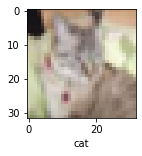

In [32]:
plot_sample(X_test, y_test,8)

In [33]:
classes[y_classes[3]]

'airplane'